© Alexander Jüstel, Fraunhofer IEG, Institution for Energy Infrastructures and Geothermal Systems, RWTH Aachen University,
GNU Lesser General Public License v3.0


This notebook was created by Alexander Jüstel and is part of the DGE Rollout Heat Demand Mapping project carried out by students of RWTH Aachen University within the framework of their master thesis. 


# Statistical Evaluation of the total Heat demand data

This notebook illustrates the statistical evaluation on a national scale for the total heat demand using `rasterstats` and `pandas`.


# Calculating Zonal Statistics for the total heat demand

The zonal statistics will be calculated using a shape file containing one polygon for each country and the raster containing the combined total heat demand.

# Importing Libraries

In [20]:
# Importing Libraries
from rasterstats import zonal_stats
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Calculating zonal statistics
stats_tot_heat = zonal_stats("../../../data/heat_demand_mapping/shape/Interreg_NWE_Countries_3034.shp", 
                             "../../../data/heat_demand_mapping/tif_results/NWE_HD_res_tert.tif",
                             stats="count min mean max median sum std",
                             geojson_out=True)


## Storing the properties in a list 

All Properties will be stored in a list. The name of the countries will be stored as well to identify the data set later on.

In [3]:
# Creating list of properties dicts
properties_tot_heat = [stats_tot_heat[i]['properties'] for i in range(len(stats_tot_heat))]
properties_tot_heat[:2]

[OrderedDict([('NAME_LATN', 'France'),
              ('NUTS_NAME', 'France'),
              ('area2', 260768),
              ('min', 5.461e-12),
              ('max', 94521.68930143511),
              ('mean', 71.154142093934),
              ('count', 5093458),
              ('sum', 362420634.2814849),
              ('std', 253.29669291519951),
              ('median', 14.532176504205658)]),
 OrderedDict([('NAME_LATN', 'Great Britain'),
              ('NUTS_NAME', 'Great Britain'),
              ('area2', 154556),
              ('min', 9.28e-12),
              ('max', 4888.232075345464),
              ('mean', 159.28759913486041),
              ('count', 2652955),
              ('sum', 422582832.5628236),
              ('std', 211.77615599393795),
              ('median', 52.81862835075685)])]

## Creating a Dataframe from dicts

A dataframe containing all statistical values is created. 

In [4]:
# Creating DataFrame from list of dicts
df_tot_heat = pd.DataFrame(properties_tot_heat, index=range(9))

# Creating a column called 'Region'
df_tot_heat['Region'] = df_tot_heat['NAME_LATN']

df_tot_heat

,NAME_LATN,NUTS_NAME,area2,min,max,mean,count,sum,std,median,Region
0,France,France,260768,5.461000e-12,94521.689301,71.154142,5093458,3.624206e+08,253.296693,14.532177,France
1,Great Britain,Great Britain,154556,9.280000e-12,4888.232075,159.287599,2652955,4.225828e+08,211.776156,52.818628,Great Britain
2,Ireland,Ireland,65150,2.908473e-08,3012.258403,71.154766,457267,3.253673e+07,145.867127,12.351412,Ireland
3,Netherlands,Netherlands,26826,2.054444e-09,12456.355397,139.928157,528945,7.401430e+07,216.815495,61.775036,Netherlands
4,Scotland,Scotland,74237,2.227825e-09,1697.535899,110.665201,368162,4.074272e+07,124.051232,72.712750,Scotland
5,Schweiz/Suisse/Svizzera,Schweiz/Suisse/Svizzera,38663,1.165930e-07,70218.845336,197.789685,374947,7.416065e+07,438.596251,86.724341,Schweiz/Suisse/Svizzera
6,Luxembourg,Luxembourg,2421,3.461073e-05,4471.246486,153.772670,49027,7.539013e+06,326.278647,33.080020,Luxembourg
7,Germany,Germany,136800,-3.436088e+00,212934.991741,186.052342,3261391,6.067894e+08,756.567920,65.825889,Germany
8,Belgium,Belgium,28595,4.759501e-09,200111.610525,138.525304,768080,1.063985e+08,1498.537274,43.552210,Belgium


## Cumulated Heat demand of the entire Interreg NWE region

The cumulated heat demand is equal to the `sum` of all country values in `MWh`converted to `TWh`. In addition, the column `sum` is equal to the `Combined/Total HD [TWh]`. The `Share of Total HD [%]` is the `Combined/Total HD [TWh]` divided by the cumulated heat demand and converted to `TWh`.

In [5]:
# Creating a new column called 'Combined/Total HD [TWh]'
df_tot_heat['Combined/Total HD [TWh]'] = df_tot_heat['sum']/1e6

# Calculating the total cumulated heat demand of the Interreg NWE Region
df_tot_heat_cumulated_hd = round(sum(df_tot_heat['Combined/Total HD [TWh]']),1)

# Calculating the share of national heat demand to the total heat demand of the NWE Region
df_tot_heat['Share of Total HD [%]'] = df_tot_heat['Combined/Total HD [TWh]']/df_tot_heat_cumulated_hd*100

print(str(df_tot_heat_cumulated_hd) + ' TWh')

1727.2 TWh


## Calculating the area that is covered by heat demand squares

The are that is covered by heat is equal to the `count` of pixels of the raster times the resolution (100 m * 100 m) times the conversion factor from m2 to km2. In addition, the `Average of heated area total [MWh/ha]` is equal to `mean`. 

In [6]:
# Calculating the area that is covered by heat demand squares
df_tot_heat['Area of heat demand [km2]'] = df_tot_heat['count']*100*100*1e-6

# Calculating the total Interreg NWE region where a heat demand was calculated
total_area_of_heat_demand = round(sum(df_tot_heat['Area of heat demand [km2]']))

# Creating a new column called 'Average of heated area total [MWh/ha]'
df_tot_heat['Average of heated area of Total HD [MWh/ha]'] = df_tot_heat['mean']


print(str(total_area_of_heat_demand) + ' km2')
df_tot_heat

135542 km2


,NAME_LATN,NUTS_NAME,area2,min,max,mean,count,sum,std,median,Region,Combined/Total HD [TWh],Share of Total HD [%],Area of heat demand [km2],Average of heated area of Total HD [MWh/ha]
0,France,France,260768,5.461000e-12,94521.689301,71.154142,5093458,3.624206e+08,253.296693,14.532177,France,362.420634,20.983131,50934.58,71.154142
1,Great Britain,Great Britain,154556,9.280000e-12,4888.232075,159.287599,2652955,4.225828e+08,211.776156,52.818628,Great Britain,422.582833,24.466352,26529.55,159.287599
2,Ireland,Ireland,65150,2.908473e-08,3012.258403,71.154766,457267,3.253673e+07,145.867127,12.351412,Ireland,32.536726,1.883785,4572.67,71.154766
3,Netherlands,Netherlands,26826,2.054444e-09,12456.355397,139.928157,528945,7.401430e+07,216.815495,61.775036,Netherlands,74.014299,4.285219,5289.45,139.928157
4,Scotland,Scotland,74237,2.227825e-09,1697.535899,110.665201,368162,4.074272e+07,124.051232,72.712750,Scotland,40.742722,2.358888,3681.62,110.665201
5,Schweiz/Suisse/Svizzera,Schweiz/Suisse/Svizzera,38663,1.165930e-07,70218.845336,197.789685,374947,7.416065e+07,438.596251,86.724341,Schweiz/Suisse/Svizzera,74.160649,4.293692,3749.47,197.789685
6,Luxembourg,Luxembourg,2421,3.461073e-05,4471.246486,153.772670,49027,7.539013e+06,326.278647,33.080020,Luxembourg,7.539013,0.436488,490.27,153.772670
7,Germany,Germany,136800,-3.436088e+00,212934.991741,186.052342,3261391,6.067894e+08,756.567920,65.825889,Germany,606.789435,35.131394,32613.91,186.052342
8,Belgium,Belgium,28595,4.759501e-09,200111.610525,138.525304,768080,1.063985e+08,1498.537274,43.552210,Belgium,106.398515,6.160173,7680.80,138.525304


In [7]:
# Calculating the average heat demand of the heated area 
average_of_heated_area_total = sum(df_tot_heat['mean'])/9

print(average_of_heated_area_total)

136.48109622812873


## Area Statistics of the Interreg NWE Region

To perform simple statistics on the Interreg NWE Region, we load the shape file that we used for the previous calculations of zonal statistics using `geopandas`. 



In [8]:
# Loading the Interreg NWE Region as Shape File
gdf_interreg_nwe = gpd.read_file("../../../data/heat_demand_mapping/shape/Interreg_NWE_Countries_3034.shp")

# Adding the area im m2 to the gdf
gdf_interreg_nwe['area'] = gdf_interreg_nwe.area

# Converting the area in m2 to km2
gdf_interreg_nwe['Area (planimetric) [km2]'] = round(gdf_interreg_nwe['area']*1e-6)

# Changing the data type of the column to int
gdf_interreg_nwe['Area (planimetric) [km2]'] = gdf_interreg_nwe['Area (planimetric) [km2]'].astype(int)

# Calculating the total planimetric area of the Interreg NWE Region
gdf_interreg_nwe_total_area_planimetric = sum(gdf_interreg_nwe['Area (planimetric) [km2]'])

# Adding the ellipsoidal areas manually to the DataFrame, values were calculated using QGIS
gdf_interreg_nwe['Area (ellipsoidal) [km2]']= [279030,
                                               165486,
                                               69738,
                                               28755,
                                               78684,
                                               41263,
                                               2596,
                                               146607,  
                                               30665]  

# Calculating the total ellipsoidal area of the Interreg NWE Region
gdf_interreg_nwe_total_area_ellipsoid = sum(gdf_interreg_nwe['Area (ellipsoidal) [km2]'])

# Calculating the share of each country to the total ellipsoidal Interreg NWE Region
gdf_interreg_nwe['Share of Total Area [%]'] = gdf_interreg_nwe['Area (ellipsoidal) [km2]']/gdf_interreg_nwe_total_area_ellipsoid*100

print(str(gdf_interreg_nwe_total_area_planimetric) + ' km2')
print(str(gdf_interreg_nwe_total_area_ellipsoid) + ' km2')
gdf_interreg_nwe

788016 km2
842824 km2


,NAME_LATN,NUTS_NAME,area2,geometry,area,Area (planimetric) [km2],Area (ellipsoidal) [km2],Share of Total Area [%]
0,France,France,260768,"MULTIPOLYGON (((2930641.617 2531547.039, 29306...",2.607676e+11,260768,279030,33.106556
1,Great Britain,Great Britain,154556,"MULTIPOLYGON (((2874711.281 2699278.506, 28747...",1.545561e+11,154556,165486,19.634704
2,Ireland,Ireland,65150,"MULTIPOLYGON (((2651794.967 2994393.242, 26518...",6.514953e+10,65150,69738,8.274325
3,Netherlands,Netherlands,26826,"MULTIPOLYGON (((3667957.194 2938854.305, 36680...",2.682582e+10,26826,28755,3.411744
4,Scotland,Scotland,74237,"MULTIPOLYGON (((3075395.957 3245560.731, 30753...",7.423735e+10,74237,78684,9.335757
5,Schweiz/Suisse/Svizzera,Schweiz/Suisse/Svizzera,38663,"POLYGON ((3963266.327 2322163.044, 3963280.662...",3.866341e+10,38663,41263,4.895803
6,Luxembourg,Luxembourg,2421,"POLYGON ((3733429.004 2606067.737, 3733284.924...",2.421410e+09,2421,2596,0.308012
7,Germany,Germany,136800,"MULTIPOLYGON (((3954764.925 2330292.165, 39546...",1.368000e+11,136800,146607,17.394735
8,Belgium,Belgium,28595,"MULTIPOLYGON (((3496569.868 2727532.821, 34976...",2.859470e+10,28595,30665,3.638363


## Calculating Average total heat demand

In [9]:
# Calculating the average total heat demand including not heated areas
average_total_heat_demand = df_tot_heat_cumulated_hd/gdf_interreg_nwe_total_area_ellipsoid * 1e4

print(str(average_total_heat_demand)+' MWh/ha')

20.493009216633602 MWh/ha


## Merge DataFrames

The two DataFrames are now being merged. In addition, a row for the values of the entire Interreg NWE Region is added.

In [10]:
# Merging DataFrames
gdf_tot_heat = pd.merge(df_tot_heat, gdf_interreg_nwe, 
                        on=['NUTS_NAME', 'area2'], 
                        how='left')

# Calculating the average HD demand per hectare including areas that are not heated 
gdf_tot_heat['Average of Total HD [MWh/ha]'] = gdf_tot_heat['Combined/Total HD [TWh]']*1e6/gdf_tot_heat['Area (ellipsoidal) [km2]']/100

# Calculating the share of heated heat demand area to the total area
gdf_tot_heat['Share of heated heat demand area [%]'] = gdf_tot_heat['Area of heat demand [km2]']/gdf_tot_heat['Area (ellipsoidal) [km2]']*100

# Creating a dict summarizing the the calculated values for the entire Interreg NWE Region
total_interreg = {'Region': 'Interreg NWE', 
                  'Area (planimetric) [km2]': gdf_interreg_nwe_total_area_planimetric,
                  'Area (ellipsoidal) [km2]': gdf_interreg_nwe_total_area_ellipsoid,
                  'Share of Total Area [%]': 100, 
                  'Combined/Total HD [TWh]': df_tot_heat_cumulated_hd,
                  'Share of Total HD [%]': 100, 
                  'Average of Total HD [MWh/ha]': average_total_heat_demand,
                  'Average of heated area of Total HD [MWh/ha]': average_of_heated_area_total, 
                  'Area of heat demand [km2]': total_area_of_heat_demand,
                  'Share of heated heat demand area [%]': total_area_of_heat_demand/gdf_interreg_nwe_total_area_ellipsoid*100}

# Appending the row to the DataFrame
gdf_tot_heat = gdf_tot_heat.append(total_interreg,ignore_index=True)

# Selecting columns
gdf_tot_heat = gdf_tot_heat[['Region', 'Area (planimetric) [km2]', 
                             'Area (ellipsoidal) [km2]', 
                             'Share of Total Area [%]', 
                             'Combined/Total HD [TWh]', 
                             'Share of Total HD [%]', 
                             'Average of Total HD [MWh/ha]', 
                             'Average of heated area of Total HD [MWh/ha]', 
                             'Area of heat demand [km2]',
                             'Share of heated heat demand area [%]']].sort_values(by='Combined/Total HD [TWh]', ascending=False).reset_index().drop('index', axis=1)
gdf_tot_heat.round(decimals=1)#.style.applymap(lambda x: "background-color: red" if x>0 else "background-color: green")

,Region,Area (planimetric) [km2],Area (ellipsoidal) [km2],Share of Total Area [%],Combined/Total HD [TWh],Share of Total HD [%],Average of Total HD [MWh/ha],Average of heated area of Total HD [MWh/ha],Area of heat demand [km2],Share of heated heat demand area [%]
0,Interreg NWE,788016,842824,100.0,1727.2,100.0,20.5,136.5,135542.0,16.1
1,Germany,136800,146607,17.4,606.8,35.1,41.4,186.1,32613.9,22.2
2,Great Britain,154556,165486,19.6,422.6,24.5,25.5,159.3,26529.6,16.0
3,France,260768,279030,33.1,362.4,21.0,13.0,71.2,50934.6,18.3
4,Belgium,28595,30665,3.6,106.4,6.2,34.7,138.5,7680.8,25.0
5,Schweiz/Suisse/Svizzera,38663,41263,4.9,74.2,4.3,18.0,197.8,3749.5,9.1
6,Netherlands,26826,28755,3.4,74.0,4.3,25.7,139.9,5289.4,18.4
7,Scotland,74237,78684,9.3,40.7,2.4,5.2,110.7,3681.6,4.7
8,Ireland,65150,69738,8.3,32.5,1.9,4.7,71.2,4572.7,6.6
9,Luxembourg,2421,2596,0.3,7.5,0.4,29.0,153.8,490.3,18.9


In [11]:
gdf_tot_heat.round(decimals=1).to_csv('Statistics_Total_Heat_Demand.csv', index=False)

# Calculating the contributions of the residential and commercial heat demand to the total heat demand of each country

In [12]:
gdf_res_heat = pd.read_csv('Statistics_Residential_Heat_Demand.csv')
gdf_res_heat

,Region,Area (planimetric) [km2],Area (ellipsoidal) [km2],Share of Total Area [%],Residential HD [TWh],Share of Residential HD [%],Average of Residential HD [MWh/ha],Average of heated area of Residential HD [MWh/ha],Area of heat demand [km2],Share of heated heat demand area [%]
0,Interreg NWE,788016,842824,100.0,1129.3,100.0,13.4,88.4,124161.0,14.7
1,Germany,136800,146607,17.4,340.3,30.1,23.2,123.0,27673.1,18.9
2,Great Britain,154556,165486,19.6,320.6,28.4,19.4,120.8,26529.4,16.0
3,France,260768,279030,33.1,266.7,23.6,9.6,54.0,49371.1,17.7
4,Belgium,28595,30665,3.6,75.3,6.7,24.6,98.6,7640.9,24.9
5,Netherlands,26826,28755,3.4,52.2,4.6,18.2,122.8,4250.3,14.8
6,Schweiz/Suisse/Svizzera,38663,41263,4.9,47.3,4.2,11.5,130.1,3636.8,8.8
7,Ireland,65150,69738,8.3,22.1,2.0,3.2,48.3,4569.1,6.6
8,Luxembourg,2421,2596,0.3,4.8,0.4,18.4,97.5,490.2,18.9
9,Scotland,74237,78684,9.3,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
gdf_com_heat = pd.read_csv('Statistics_Commercial_Heat_Demand.csv')
gdf_com_heat

,Region,Area (planimetric) [km2],Area (ellipsoidal) [km2],Share of Total Area [%],Commercial HD [TWh],Share of Commercial HD [%],Average of Commercial HD [MWh/ha],Average of heated area of Commercial HD [MWh/ha],Area of heat demand [km2],Share of heated heat demand area [%]
0,Interreg NWE,788016,842824,100.0,557.1,100.0,6.6,64.4,79312.0,9.4
1,Germany,136800,146607,17.4,266.4,47.8,18.2,94.3,28263.4,19.3
2,Great Britain,154556,165486,19.6,102.0,18.3,6.2,38.5,26529.4,16.0
3,France,260768,279030,33.1,95.7,17.2,3.4,92.8,10316.7,3.7
4,Belgium,28595,30665,3.6,31.1,5.6,10.1,72.1,4314.9,14.1
5,Schweiz/Suisse/Svizzera,38663,41263,4.9,26.9,4.8,6.5,96.3,2788.5,6.8
6,Netherlands,26826,28755,3.4,21.8,3.9,7.6,106.9,2039.4,7.1
7,Ireland,65150,69738,8.3,10.4,1.9,1.5,22.7,4569.1,6.6
8,Luxembourg,2421,2596,0.3,2.8,0.5,10.6,56.3,490.2,18.9
9,Scotland,74237,78684,9.3,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
gdf_merge = pd.merge(gdf_tot_heat[['Region', 'Combined/Total HD [TWh]']], gdf_res_heat[['Region', 'Residential HD [TWh]']], 
                        on=['Region'], 
                        how='left')
gdf_merged = pd.merge(gdf_merge, gdf_com_heat[['Region', 'Commercial HD [TWh]']], 
                        on=['Region'], 
                        how='left')
gdf_merged['Total HD summed up [TWh]'] = gdf_merged['Residential HD [TWh]'] + gdf_merged['Commercial HD [TWh]']
gdf_merged['Share of Residential HD [%]'] = gdf_merged['Residential HD [TWh]']/gdf_merged['Combined/Total HD [TWh]']*100
gdf_merged['Share of Commercial HD [%]'] = gdf_merged['Commercial HD [TWh]']/gdf_merged['Combined/Total HD [TWh]']*100
gdf_merged.round(1).sort_values(by='Share of Residential HD [%]', ascending=False)

,Region,Combined/Total HD [TWh],Residential HD [TWh],Commercial HD [TWh],Total HD summed up [TWh],Share of Residential HD [%],Share of Commercial HD [%]
2,Great Britain,422.6,320.6,102.0,422.6,75.9,24.1
3,France,362.4,266.7,95.7,362.4,73.6,26.4
4,Belgium,106.4,75.3,31.1,106.4,70.8,29.2
6,Netherlands,74.0,52.2,21.8,74.0,70.5,29.5
8,Ireland,32.5,22.1,10.4,32.5,67.9,32.0
0,Interreg NWE,1727.2,1129.3,557.1,1686.4,65.4,32.3
5,Schweiz/Suisse/Svizzera,74.2,47.3,26.9,74.2,63.8,36.3
9,Luxembourg,7.5,4.8,2.8,7.6,63.7,37.1
1,Germany,606.8,340.3,266.4,606.7,56.1,43.9
7,Scotland,40.7,0.0,0.0,0.0,0.0,0.0


# Creating Donut Charts from Statistical Values

## Extracting the Shares for each sector

In [17]:
share_totHD = gdf_tot_heat[['Region', 'Share of Total HD [%]']][1:]
share_resHD = gdf_res_heat[['Region', 'Share of Residential HD [%]']][1:]
share_comHD = gdf_com_heat[['Region', 'Share of Commercial HD [%]']][1:]

## Define function to add share to donut chart

In [18]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)

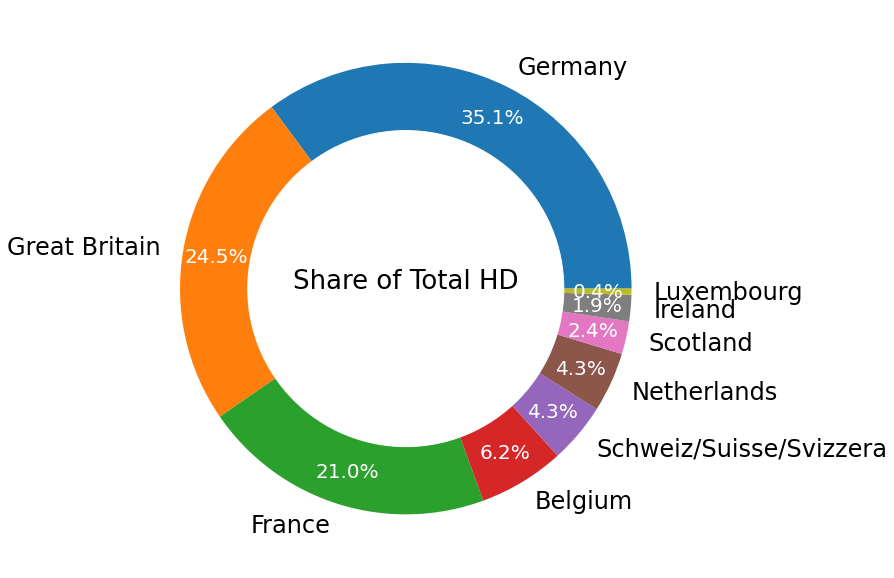

In [29]:
plt.figure(figsize=(12,12))
wedges, texts,  autotexts = plt.pie(share_totHD['Share of Total HD [%]'].values, labels=share_totHD['Region'].to_list(), autopct=lambda pct: func(pct, share_totHD['Share of Total HD [%]'].values), pctdistance=0.85, textprops={'fontsize': 24})
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
plt.setp(autotexts, size=20, color='white')
p.gca().add_artist(my_circle)
plt.text(-0.5,0, 'Share of Total HD', fontsize=26)
plt.tight_layout()
plt.show()

#plt.savefig('Share_of_total_HD.png', dpi=300)

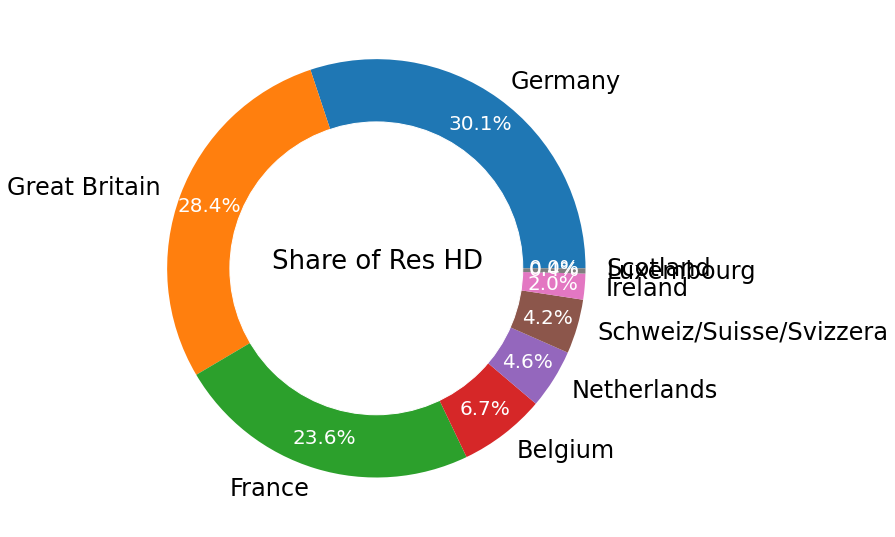

In [31]:
plt.figure(figsize=(12,12))
wedges, texts,  autotexts = plt.pie(share_resHD['Share of Residential HD [%]'].values, labels=share_resHD['Region'].to_list(), autopct=lambda pct: func(pct, share_resHD['Share of Residential HD [%]'].values), pctdistance=0.85, textprops={'fontsize': 24})
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
plt.setp(autotexts, size=20, color='white')
p.gca().add_artist(my_circle)
plt.text(-0.5,0, 'Share of Res HD', fontsize=26)
plt.tight_layout()
plt.show()

#plt.savefig('Share_of_total_HD.png', dpi=300)

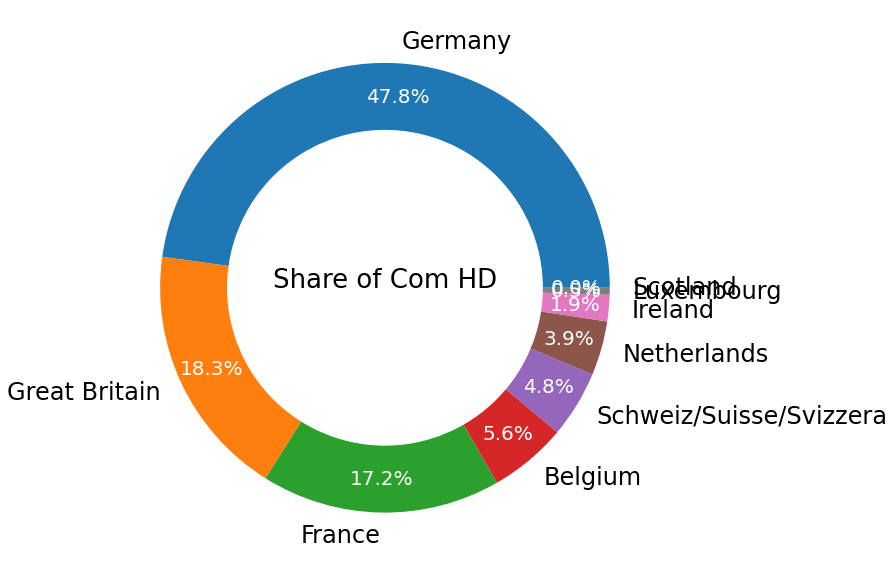

In [36]:
plt.figure(figsize=(12,12))
wedges, texts,  autotexts = plt.pie(share_comHD['Share of Commercial HD [%]'].values, labels=share_comHD['Region'].to_list(), autopct=lambda pct: func(pct, share_comHD['Share of Commercial HD [%]'].values), pctdistance=0.85, textprops={'fontsize': 24})
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
plt.setp(autotexts, size=20, color='white')
p.gca().add_artist(my_circle)
plt.text(-0.5,0, 'Share of Com HD', fontsize=26)
plt.tight_layout()
plt.show()

#plt.savefig('Share_of_total_HD.png', dpi=300)